<div align='center'>

## Image Processing

### Practical 1: Image Storage and Display

##### Version 1.4, 15th Feb, 2023
</div>

### 1. Introduction
The purpose of this practical is to introduce some basic tools and concepts that are required for working with digital images.  The choice of the topics for this first practical has been informed by personal experience gained from working in medical imaging, specifically where one is _close_ to the image acquisition process, and to the mapping between some measured value and an image representation that, eventually, leads to a displayed image.  The other source of motivation for the topics covered in this practical is, to some extent, in visualising information that represents some function of 2 dimensional position, of the form $f(x,y)$. 

The mapping of some 2D function of position to a scalar intensity or vector (colour) value is implicit in the concept of an image.  Of course, the images we will deal with are always sampled on a discrete spatial grid instead of functions of continuous spatial variables you might have met in mechanics or fluids analysis. Conventionally, as for the main notes, we denote such images by $f(m,n)$, where it is to be understood that $m$ and $n$ are integer values.

Within this practical, there are two distinct themes that should be seen as learning objectives.  These objectives are:

1.	To appreciate how images are stored on  
    disk: what the nature of the image 
    representation is, and how to get at 
    information within an image file.  We will 
    touch on meta-information as well, which is 
    often very important in “unscrambling” an 
    image representation on disk, or otherwise in 
    a sequence of bytes.

2.	To appreciate the mapping between the 
    image representation held in a computer’s 
    memory (such as in an array within a program) 
    and the visual display of the computer; 
    actually, what really needs to be emphasised 
    is that there is a mapping, and appreciating 
    the nature of this mapping can be very 
    important in correctly displaying images.


The **first** topic we will briefly tackle regards the reading of image data held on disk. In the first part of the practical, you should ask the demonstrators to explain the commands being used to read the "head" image. Once you understand the nature of an image representation as a sequence of byte values, it will be easier to understand why dedicated file formats are needed to represent image data. 

The **second** topic deals with the display of images on a computer screen. Since most of you are familiar with the idea of auto-scaling graphical plots (found in Matlab, Excel etc.), the display of image data, in which the dynamic range of pixel values may differ from that of the "displayable", range may present some surprises. This is compounded by fact that in image display, there is often no associated representation of the actual magnitude or signs of the values being displayed. When trying to interpret scientific measurements over 2D space via an image on screen, one therefore has to be a little bit cautious.


So, following Section 2 (on reading an image as a stream of raw bytes), there will be an introduction to colourmaps, also known as colour palettes. Once you appreciate colourmaps, and the way that image display relies on them, you will be in a position to begin working with processed images, where the dynamic range and values that are produced as a result of some stages of image processing may not match those of typical "raw" captured image data: values may be outside the range of the colour palette. The processed images that we shall be considering in Practical 2 are those that arise after performing arithmetic or set-based operations on pixels, including those obtained from local spatial operators.

### 2. An image as a "byte stream"

In developing new imaging systems, or in working with digital cameras, one sometimes encounters images stored in their most unstructured form: as a series of bytes, where each byte encodes the colours or intensities received by a pixel sensor. Indeed, if working with unusual medical imaging equipment, sometimes one is faced with a proprietary file format for storing image data, and one has to read supposedly structured data by treating it as _unstructured_. Whilst this may sound bizarre, it is a fact of life to which many imaging scientists get used to when using rare, expensive or legacy imaging equipment. 

For those of you that have met the idea of "serialization", such as in _Python_, it is the idea that data as stored on a hard disk, or as a series of bits to be transmitted in sequence, like a message, are stored in a one-dimensional fashion, even if the values represent a spatial structure, like an image. 

We will first load a “raw” data file image into _Python_ and organise it into an image array. The file was _exported_ from image display software used decades ago in-house, and with a proprietary file format. A magnetic resonance image of a slice of the human head is provided, with pixel dimensions of 128 rows x 128 columns. The image you will work with was exported into a file as a sequence of bytes, of length equal to the number of pixels (16,384). The commands in _Python_ are quite similar to those needed to read the data using C programming, or pretty much any functional programming environment, including _Matlab_. 

Start by downloading the file “ImageDataFiles.zip” from the same place on BlackBoard where you found this document. Download this, and unzip the files into a directory that you have access to.  We will refer to the directory containing the unzipped files as `<PathContainingFiles>`, and so you need to replace this string with the true path for your particular case in what follows below.  

 If the zip file is on your current machine, you may need to specify a drive letter (e.g. ``C:\<PathContainingFiles>``). If the files are on a remote server, and you are on a Windows machine, this path might also be specified using the Windows Universal Naming Convention (UNC) (e.g.`\\dataserver.domain.where.uk\LaboratoryData`); the equivalent is usually easily found for Linux or MacOS.

Also, if working off the networked home directories, you may be able to access this by including `H:\`, or `M:\` before the rest of the directory path, depending on what IMperial's ICT's latest choice of naming convention is.  A test to see whether you have the path right is to use the following from either a _Python_ interpreter, or execute a cell containing this command:

In [1]:
import os
import sys

os.path.isfile('IMGS/head.128') 
# If you have the path to the file right, you will get 'True'

True

We can also grab simple file-system information about this file's statistics

In [2]:
# Let's look at the file size.....
if (os.path.isfile('IMGS/head.128')):
    FileStats = os.stat('IMGS/head.128') 
    print('Size of file is', FileStats.st_size,'bytes')

Size of file is 16384 bytes


In [3]:
with open('IMGS/head.128', 'rb') as binary_file:
    # `binary_file` is now an object with methods for reading....
    # Read the whole file at once
    # Note that you may not find many examples of this
    # online, as reading pure binary files is seen as rare
    # by many who work with pre-prepared images
    data = binary_file.read()

We can check on the size of this chunk of data like so:

In [4]:
len(data)

16384

But as far as _Python_ knows, this is not an image - it is just a collection of bytes.

In [5]:
type(data)

bytes

We need to tell the _Python_ kernel that this lump of data can be treated as a collection of unsigned integer values, converting each byte to an integer between 0 and 255 (so, an _unsigned_ integer). If you do not know what this means, please speak with a GTA/UTA. Luckily, `numpy` has code for doing this, trivial as it is, it is really useful.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Line below allows us to treat bytes data as integers...
data = np.frombuffer(data, dtype=np.uint8)

# The next line tells us how to organise it
x = np.reshape(data,(128,128))

Text(0.5, 1.0, 'Fig. 1')

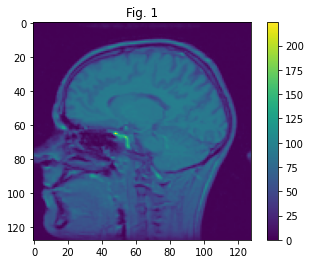

In [7]:
# See box below for the explanation of this directive
%matplotlib inline 
#%matplotlib
plt.imshow(x)
plt.colorbar()
plt.title('Fig. 1')

<div class="alert alert-info">
    
It is convenient to display the images directly into the Notebook (this is called _inline_ figure graphics). However, you will find that it is often very useful to either be able to zoom into an image, or hover the mouse (cursor) over a particular pixel to interrogate its value. To do this, you will want to use an external dipslay tools, which would normally exist outside of the notebook, providing these extra tools. To access these, what you need to do is to place the following somewhere in your notebook, after you have imported **matplotlib**:
    
```python
%matplotlib
```

You should then re-start the kernel, re-running all commands up to the point of image display. Rather opaquely, this "directlive" tells the Jupyter kernel to invoke an external image viewer/plot figure, which provides you with some extra functionality for zooming, panning and most importantly, interrogating pixel values directly; so, you can easily use the mouse/cursor to figure out what value exists in the image array at a particular location. This is very useful for really getting to appreciate the nature of colourmaps, and also to probe specific values you may have in an image, particularly after applying some operator.

To go back to having the images displayed directly in the Notebook, without the extra helpful tools, use 

```
%matplotlib inline
```
    
</div>

**Interlude 1** Key learning outcomes from this first exercise with the `head.128` image.

If you investigate this image file using `Finder` on MacOS or using the File Browser (or command line commands) on _Windows 10/11_, or using `ls -l` on Linux, you will see that it contains only 16,384 bytes. That is, exactly one byte for every pixel. There is no additional information about how many rows and columns of the image, no information on the colour space to be used, or indeed a colour map. The only way we can load and display this image is because _a priori_ the author of this notebook knew what the image contained, and that information is then used to reshape and display the image once the sequence of bytes has been loaded from disk.

In contrast, the other images we will look at are stored in standard file formats, including TIFF and DICOM 3.0. For these image types, not only will there be additional information about the image (such as geometry), but also one or more possible forms of compression will be applied.

### 3. The nature of colourmaps 

In order to understand the operation of colourmaps, also known as colour Look-Up Tables (LUT's) or colour palettes, you need to know a little bit about how images are displayed. In particular, it is important to realize that there is a distinct stage in any image display system which consists of mapping the pixel values contained in the image matrix, $x(m,n)$, onto the colour and intensity space “understood” by the screen. 

Display systems of many current PC's, and of Linux workstations (including Mac OS X, which is built on top of a Berkeley Unix distribution), have three colour input signals, corresponding to red, green and blue components. On older high-end workstations, the three components are generally provided by three coaxial connectors connecting the workstation to its monitor. On older everyday PC's, the three signals are within the VGA connector. On modern digital connectors, the signals between the computer and the screen are be digital, and _serialized_ so that the conversion to an analogue signal used to drive the pixels onscreen will occur in the monitor.  So there may be subtle differences in where the conversion from digital representation to a final displayed intensity happens; don’t get too hung up on this, but do recognise that some sort of mapping from byte values to intensity takes place.

Any colour which you see on screen (including shades of grey) is made from specific combinations of the three additive primary colours, red, green and blue. Thus, any program or “application” which displays an image on your computer must have some means of mapping the pixel values contained in the image to the appropriate combinations of red, green and blue signals. The required mapping process is performed by using a combination of hardware and a set of low-level software routines. 

The nature of the mapping is specified by a data structure that represents a colour look-up table or possibly even a hardware-implemented colour palette. 

A rough conceptual diagram of the mapping performed by a colourmap is shown in **Fig. 2**. Note that the colour look up table (LUT) or colourmap really does serve as a kind of reference table, associating particular values of red, green and blue with particular pixel values. Some palettes contain a fourth column, which is known as the alpha channel, which specifies transparency.


![Colourmap](./IMGS/ColourMapFigure.png)

**Fig 2.** Colourmap concept. An image array containing a single byte per pixel does not have a predefined appearance on screen without a colourmap. The colourmap shown here as 4 column table is actually corresponds to a 3 column colourmap, has the one column that only holds the row number is just the index corresponding to the row of the 2D array representing the colourmap. So, this would be stored as an $N  \times$ 3 array, where $N$ is the number of rows (or colourmap "slots" or "entries"). The colourmaps in **matplotlib** contain 4 columns, with the last column corresponding to a so called alpha value. We can be safe in setting this to 1, and that represents a transparency of 0 (so alpha really represents _opacity_, though it is sometimes called transparency).

So, let's apply a grey scale colourmap to the image (that's what most medical images have as default; colours are usually reserved for functional, or activation maps)

Text(0.5, 1.0, 'Fig. 3')

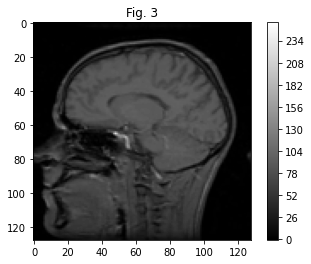

In [8]:
from matplotlib import colors
plt.imshow(x, cmap='gray', norm=colors.NoNorm()) # Integer x values mapped directly to 
                                                 # corresponding row of the colourmap
plt.colorbar()
plt.title('Fig. 3')

We can also turn off the axis if we don't need to inspect pixel locations like this:

Text(0.5, 1.0, 'Fig. 4')

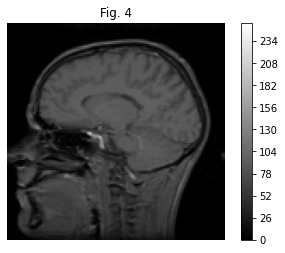

In [9]:
plt.imshow(x, cmap='gray', norm=colors.NoNorm())
plt.colorbar()
plt.axis('off')
plt.title('Fig. 4')

Now, we are going to investigate the colourmap structures.

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as colors
cmap = cm.get_cmap('gray')

/var/folders/3z/cw3gkq2n01q9crzm7tl8zl7w0000gn/T/ipykernel_82902/3350345247.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gray')


In [11]:
type(cmap)

matplotlib.colors.LinearSegmentedColormap

The following command invokes the creation of the requested colourmap; typing this in a line on its own was not required in older versions of _Matplotlib_, but is required now or correct functioning.

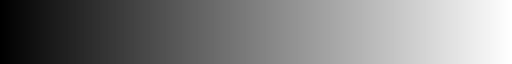

In [12]:
cmap # show yourself! (also 'initialises' itself)

If we want to see a bit more about what _methods_ and attributes are available to us, we can use the following syntax:

`dir(cmap)`

The number of entries in the colourmap is provided by `cmap.N`, and the colour look-up-table itself that represents the gray scale map is held in `cmap._lut`.

So, if we type:
```python
cmap.N
```

In [13]:
cmap._lut

array([[0.        , 0.        , 0.        , 1.        ],
       [0.00392157, 0.00392157, 0.00392157, 1.        ],
       [0.00784314, 0.00784314, 0.00784314, 1.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [14]:
cmap.N

256

you will find the (quite common) colourmap size of 256 entries. The colour table iteself has some surprises; let's look at this step by step.  First, ty this:

In [15]:
np.shape(cmap._lut) # Should give us the shape of the colourmap

(259, 4)

So, there are two odd observations. First, rather than having 3 columns (for R, G and B) respectively, this colourmap has 4 columns! Secondly, rather than having 256 rows (as suggested by `cmap.N`, there are an extra 3 entries in the look-up-table. First, let us examine the values in the rightmost column:

In [16]:
A = cmap._lut[:,3]
print(A)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


So, we can see that the rightmost values are pretty much all 1, apart from the very last value. The values in this column are actually opacity values, and explain how this colour should be blended with a background colour. We'll come back to this later; for now, let's look at the R,G and B values, which are the leftmost, second and third columns respectively from the left:

In [17]:
RGBA = cmap._lut
print(RGBA)

[[0.         0.         0.         1.        ]
 [0.00392157 0.00392157 0.00392157 1.        ]
 [0.00784314 0.00784314 0.00784314 1.        ]
 ...
 [0.         0.         0.         1.        ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


So, this is worth a plot, I think:
```python
plt.plot(RGBA[:,0])
```

You can see that the values in this first colunm increase ina linear fashion until near the end. Indeed, if we take only the first 256 values of this array:

Text(0.5, 1.0, 'Fig. 5')

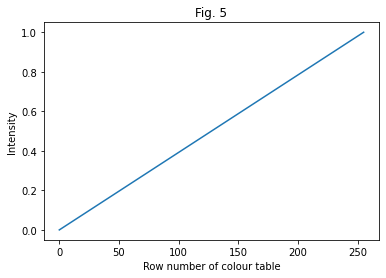

In [18]:
plt.plot(RGBA[0:256,0])
plt.xlabel('Row number of colour table')
plt.ylabel('Intensity')
plt.title('Fig. 5')

**Quiz:** 

1. What is the pattern of values in this column? 

2. What values are in the other 2 columns i.e. column index 1 and column index 2?  Why are the values like this?

3. Why are there more entries in the table than the colourmap seems to suggest (`cmap.N`)?

--> My answer:
1. It's linear? basically intensity increases linearly as we go to the next row
2. in row i=1 is green, in row i=2 is blue. the values are 2 bits (1 byte per pixel)
3. a header maybe? 


<details>
     <summary outline="1pt">🆘 Click <b>here</b> for answers to the quiz</summary>
   
    
_Answers_
    
1. The pattern of values in the leftmost (first, column index = 0) column of the array refer to the intensities assigend to the <b>red</b> channel. Each row corresponds to one different colour in the palette.

2. The values in the other two columns correspond to the intensities on the green and blue channels respectively. They are equal because for any shade of gray, the values of all three channels are equal; this defines a line in the 3D colour space of the RGB cube.

3. This is a tough question. Though the number of entries in the colour map is **supposed** to be given by `cmap.N`, and though we can find a nice pattern to 256 entries (i.e. equal to the number of values reported by `cmap.N`, some extra values are sneakily added onto the colourmap. This appears to me to be a (bad) design choice by the writers of the colourmap module to sneak some extra entries in so that if you have a 
full colourmap, you can add on some extra basic colours as an emergency measure. E.g. we often want to annotate an image using a colour that is clearly visible. The fact that the extra colours we see in this particular colourmap appear to be primary colours is consistent with the idea of still being able to write text on top of the image in such a way that it is visible (so giving a text, line or arrow annotation it one of the standard colours like 'red', or 'green' can still easily be done). It looks as though the extra colours correspond to black and white with a one extra colour having a different alpha value. My guess is that these (undocumented) extra three slots are kept for writing in text on the image in black or white.  I would suggest not losing too much sleep over it: the other stuff on colourmaps that I have indicated is correct -- I have worked with such structures for over 20 years, and I this the first case I have come across of such sloppily coded colourmaps.

</details>

Now, image display based on `plt.imshow` is not _fully_ correctly implemented in **matplotlib**. We can see this if we compare what the **matplotlib** documentation says _should_ happen with what actually happens. We can get confirmation of these inconsistencies by comparing with outputs in _Matlab_, where the documentation is consistent with the behaviour of equivalent code. The difference and inconsistencies are almost certainly because of the user-contributed nature of **matplotlib**, but it is something one can live with!

Let's return to look at the command we have used for display; the option
`norm=colors.NoNorm())` sets `imshow` to map colours directly through the colour palette; so the value in the image array `x` is used to identify a specific row of the color palette, and the color specified in that row is used for the corresponding pixel. This gives us precise control over the mapping of values in  image array `x` to screen appearance.

However, the *default* behaviour of `imshow()` (without forcing the option of no normalisation) is to rescale values between the smallest and largest values in the image array, `x`, so that they lie in the range 0 to 1 in a floating point representation. Using this mapping is convenient, but loses you the intuition of how colourmaps work in a more mechanistic sense. In short, you need to imagine that the first row of the table corresponds to floating point 0, and the last row corresponds to floating point 1. Intermediate rows of the colour lookup table will approximate to some floating point value. This is quite misleading, because the colourmap entries are always indexed (e.g. correspond to rows of a data structure) and this fact is being "hidden" in the default behaviour of `imshow` that relies on mapping both the image pixel values (when the image is a scalar) and the colourmap size (in terms of numbers of rows) into the same $[0,1]$ floating point range.

Indeed, in many lower-level colourmap implementations (and particularly at hardware level), you will find that the colourmap has a finite number of slots (typically 256, or 512, or perhaps in the thousands).

(-0.5, 127.5, 127.5, -0.5)

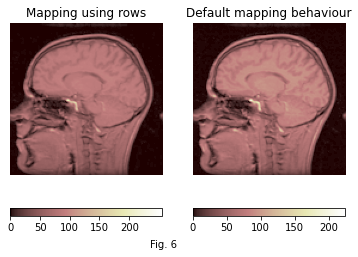

In [19]:
fig = plt.figure()
fig.text(0.45,0.1, 'Fig. 6')
ax = fig.add_subplot(1, 2, 1)

imgplot = plt.imshow(x,cmap='pink', norm=colors.NoNorm()) ## this is what we're looking at


ax.set_title('Mapping using rows')
plt.colorbar(ticks=[0, 50, 100, 150, 200], orientation='horizontal')
plt.axis('off')

ax = fig.add_subplot(1, 2, 2)

imgplot = plt.imshow(x, cmap='pink')


ax.set_title('Default mapping behaviour')
plt.colorbar(ticks=[0, 50, 100, 150, 200], orientation='horizontal') ## and comparing it with this default one
plt.axis('off')


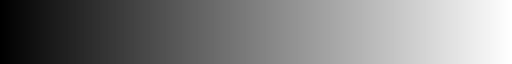

In [20]:
cmap

So, although the image on the right might look slightly brighter, because the largest and smallest values in the image array, `x` are being mapped (this case, stretched) to the brightest and darkest values in the colourmap, this can sometimes cause unexpected behaviour when the colourmap is non-linear, or contains different bands of intensity and colour values.

Nevertheless, for most of the practicals we shall meet, the defualt behaviour will do fine.  We will look at a case where the default behaviour of `imshow()` is *not* right, in **Section 4**!

<div style="background:#EEEEFF;color:black">
    
**Exercise 1** Try changing the entries in the colourmap created above, and re-render the `head` image. &#9724;

<div>

<details>
    <summary> Click <b>here</b> for one idea on how to do this....</summary>
    

There is no unique solution to this, but one simple way to approach it is to start by copying an entire colourmap that has already been defined. Then, you can fiddle around with the colourmap entries in the `_lut` attribute. So, say I want to make a 256 entry colourmap that replicates the grayscale colormap, but then play around with the entries (so, for example), I xcan set an entire column (channel) to zero; this is what that might look like:

```python

mycmap = cmap # Assumes cmap is defined from the earlier commands

mycmap._lut[:,2] = np.zeros(len(mycmap._lut[:,2]), dtype=float)
plt.imshow(x, cmap=mycmap, norm=colors.NoNorm())
    

```
    
You can then do anything you wish by playing around with the entries in the look up table. If you want to save the colourmap, you should probably register it as a new colourmap, but that is beyond the scope of this course.
    
</details>

### 4. A More Complicated Colourmap
<a id='Sec-4'></a>

In [21]:
from PIL import Image
imageObj = Image.open('IMGS/trees.tif')
cmapdata = imageObj.getpalette()
imdata = imageObj.getdata()

There are many other image reading libraries in _Python_; some of them (like the `opencv` library) are real dogs to install, and can lead to all sorts of incompatabilities. I strongly advise the use of the Python Image Library; PIL works well for many of the problems you are likely to meet.

Let us now look at the shape of these two items of data: the image array, `x`, and the colormap data, held in variable `cmap`:

In [22]:
print('Shape: ',np.shape(imdata), 'of type', type(x))

Shape:  (90300,) of type <class 'numpy.ndarray'>


So, as in the first example, the imageObj contains a pointer to a location in memory that holds 90,300 items in the format of a `numpy` array. But these should probably be pixels, so let's ignore the type for the moment. But the key question is: what dimensions should the image be? 

The `imageObj` is an instantiated class which contains a couple of attributes, which are `height` and `width` (you can see this if you do `dir(imageObj)`.

In [23]:
print('Dimensions of image (WxH):', imageObj.width, 'x', imageObj.height, 'pixels')

Dimensions of image (WxH): 350 x 258 pixels


...and we can confirm that $350\times258=90,300$, a useful sanity check!

So, if we do this:

Text(0.5, 1.0, 'Fig. 7')

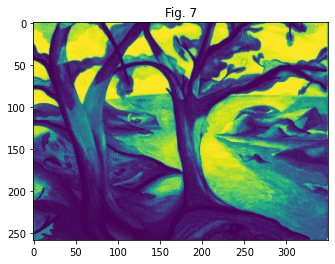

In [24]:
x = np.reshape(imdata, (imageObj.height, imageObj.width))
x = np.asarray(x, dtype=np.uint8)
plt.imshow(x)
plt.title('Fig. 7')

Now, we need to work on the colourmap.  

In [25]:
np.shape(cmapdata)

(768,)

Ok, so we do not have something of the expected 3 or 4 column table. The number of values is divisible by both 3 and 4; however, we can see that if we divide 768 by 4 we get 192, and if we divide 768 by 3, we get 256. The latter is a quite common size for a colourmap, so let's assume and use that option.

Text(0.5, 1.0, 'Fig. 8')

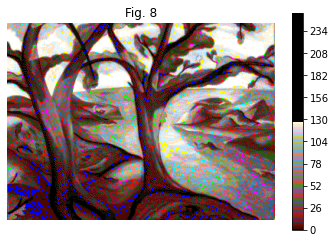

In [26]:
cmapNx3 = np.reshape(cmapdata,(256,3), order='C')
cmapNx3n = np.asarray(cmapNx3, dtype=float)/255.0
cmap = colors.ListedColormap(cmapNx3n, name='trees_colormap')
plt.imshow(x, cmap=cmap, norm=colors.NoNorm())
plt.colorbar()
plt.axis('Off')
plt.title('Fig. 8')

Well, I am afraid the image is not quite right.... But it is difficult to tell what is going wrong here, so you'll be forgiven for being puzzled!  First, note that the colourmap entries appear to be rather disorganised. Now, look at the RGB components of this colourmap. Are you surprised? (You should be!). There is a very important lesson to be learned from this example – be very careful about how you interpret the values in the image matrix of a paletted image (or an image using a colourmap). It is not necessarily the case that the largest entries in the matrix correspond to the brightest intensities in the image. This is only the case for a monotonic, linear colourmap (usually, but not always, true for a grey-scale colourmap). 

The allocation of colours (RGB components) to colourmap locations is sometimes done by an _ad-hoc_ algorithm that tries to allocate colours as needed by an application, but whilst also trying to optimise available resources in the colourmap, operating system or device; it also depends on whether other applications have also requested certain colours to be available in the palette, so allocation of colours can be a sort of negotiation, particularly on resource-constrained systems. Always check the colourmap when working with palette images, where there is one value per pixel stored in the image matrix.

But the real issue with the display of this particular image has to do with the way that `imshow()` works within Jupyter notebooks. By default, the algorithm tries to scale the image up (in size) so that it occupies a reasonable portion of screen area. In doing so, it has to map pixels of the image onto pixels of your notebook (indeed, of the laptop or monitor screen). By definition, this usually requires some sort of spatial scaling operation: if neighbouring pixels in the image array are mapped exactly to neighbouring pixels on Jupyter notebook, there would be no issue. But by default, `imshow` maps to a sort of intermediate size that is neither too large nor too small for convenience. This requires it (in essence) to zoom into or out of the image. It's default way of doing this is to use _bilinear_ interpolation. However, bilinear interpolation will fail dramtically if the colour map is not linear (so, if colours and intensities do not smoothly change from one row to the other). 

We can circumvent this by requesting that `imshow()` uses nearest-neighbour interpolation. To put this simply, if `imshow()` zooms up or down to display the image, it simply uses the nearest pixel from the original image after performing the coordinate transformation (i.e. zoom in or out), rather that trying to guess intermediate pixel values according to a linear assumption. So, turning off linear interpolation:

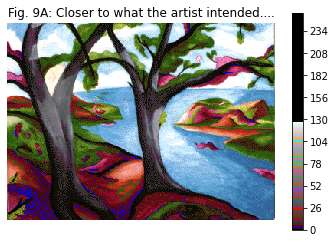

In [27]:
plt.imshow(x, cmap=cmap, interpolation='nearest', norm=colors.NoNorm())
plt.axis('Off')
plt.title('Fig. 9A: Closer to what the artist intended....')
plt.colorbar()

**NB** It is _possible_ that the two images (9A) and (9) are identical on your notebook: it will depend on the operating system and the version of **matplotlib** and possibly PIL that you have installed. To see what I am referring to in the different appearance, I also provide PDF encodings of my notebook, which show a difference.

Now that we have wrangled our way to getting this result, and discovered the rather surprising nature of this colour palette, I can reveal (!) that _Python_ does have methods that will correctly display this image, already built in. If we look at information held in `imageObj`, we will see that it contains quite a few pieces of information. These are used by `imshow` to correctly apply the intended colour map to the image:

In [28]:
np.shape(x)

(258, 350)

(-0.5, 349.5, 257.5, -0.5)

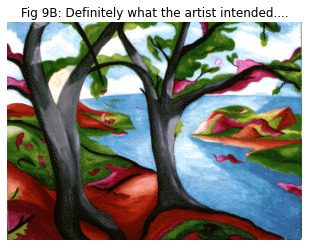

In [29]:
plt.imshow(imageObj)
plt.title('Fig 9B: Definitely what the artist intended....')
plt.axis('Off')

**Quiz** 
Can you see the differences between Figures A and B above? What do you believe is the source of these differences, and how might the image be fixed using the individual commands we have used above?

<details>
  <summary outline="1pt">🆘 Stuck on the Quiz? Click here to see a possible fix (though I 
    struggle to see an explanation of why this works better...) </summary>
    
   <p></p>

```python
%matplotlib
for m in range(np.shape(x)[0]):
    for n in range(np.shape(x)[1]):
       if x[m,n] == 4:
            x[m,n] += 1
       elif x[m,n] == 18:
            x[m,n] += 2 
       elif x[m,n] == 16:
            x[m,n] += 3
            
plt.imshow(x, cmap=cmap, interpolation='nearest', norm=colors.NoNorm())
plt.title('C: This should be closer to what the artist intended....still not perfect.')
plt.colorbar()
```
<p></p>
</details>

There is one more surprise in store for us in that `trees.tif` image. Try this:

```python
imageObj.n_frames
```

What do you think this means?  If you have time, explore, but this is **not** a priority to solve
during this lab session....

<div class="alert alert-warning">

**Take Home Message** An image array that contains a scalar value for each pixel is very common in image processing, medical imaging and computer vision. But such an image is 
uninterpretable unless you either i) know _for certain_ that the image should be interpreted using a linear colour map, or ii) you have and make use of the colourmap supplied with the image by the software that encoded it.

</div>

### 5. True Colour Images

These are decidedly different from the paletted or colourmap images we have looked at so far. In this case, for each pixel, we store red green and blue component values. We will now look at such an image.

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [31]:
imageObj = Image.open('IMGS/lily.tif')
cmapdata = imageObj.getpalette()
imdata = imageObj.getdata()

First, we are going to try to read the image ourselves from the raw pixel data. Remember that `imshow` is designed to read the relevant attributes in the object and display this for us, but this would 'hide' what is going on in this routine, so we'll do this the hard way first, to make sure you understand what goes on under the hood....

We start by getting the dimensions of the image (sometimes called the _geometry_):

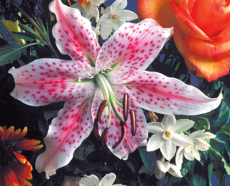

In [32]:
imageObj

In [33]:
print('Dimensions of image (WxH):', imageObj.width, 'x', imageObj.height, 'pixels')

Dimensions of image (WxH): 230 x 186 pixels


Now, let's look at the shape of the `imdata`....

In [34]:
np.shape(imdata)

(42780, 3)

Hmmm. So, what is going on here? _Hint_ See the little calculation we did in the previous section for the `trees.tif` file.

Once you have figured out where the `42780` value comes from, you can guess that the three channels (R,G,B) are being stored explicitly for each pixel. A little dive into the documentation of the `PIL Image` class [here](https://pillow.readthedocs.io/en/stable/reference/Image.html#the-image-class) shows that you can specify the channels to be read individually, or all together. I will do this one channel at a time, then reshape each channel to match the geometry.

In [35]:
W = imageObj.width
H = imageObj.height
imdata = np.zeros((H,W,3), dtype=np.uint8)
imdata[:,:,0] = np.reshape(imageObj.getdata(band=0), (H,W))
imdata[:,:,1] = np.reshape(imageObj.getdata(band=1), (H,W))
imdata[:,:,2] = np.reshape(imageObj.getdata(band=2), (H,W))

Text(0.5, 1.0, 'Fig. 11')

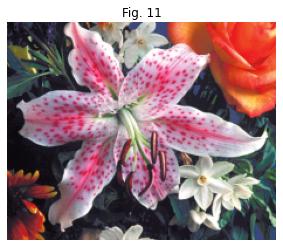

In [36]:
plt.imshow(imdata)
plt.axis('Off')
plt.title('Fig. 11')

And just to confirm that we've spent this time doing nothing partiuclarly useful, we see what happens when we through the image object directly into `plt.imshow()`:

(-0.5, 229.5, 185.5, -0.5)

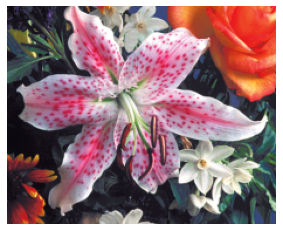

In [37]:
plt.imshow(imageObj)
plt.axis('Off')

As a final check that we grasp all of the key points about the difference between paletted and true colour images, we check the size of the colourmap associated with htis file:

In [38]:
np.shape(cmapdata)

()

So, as you might hopefully have guessed, the colourmap is empty: because each of the three values is specified explicitly in the file for each pixel, a colourmap makes no sense in this context. 

#### 4.1 Visualising the content of individual colour channels

Remember that the image contains each of the image planes corresponding to red, green 
and blue channels. We can look at these channels individually, or interpret them as grey-scale intensities. Let's do this both ways to understand what information this gives us. First: the slightly more intuitive thing: look at individual colour channels. We can do this in two ways: we can isolate individual channels, one at a time, and display them as scalar images using a colour map. Or, we can zero the channels other than the ones we are interested in.  For example:

In [39]:
ROnly = np.zeros((H,W,3), dtype=np.uint8)
ROnly[:,:,0] = imdata[:,:,0]

## how to define these 2 below?
GOnly = np.zeros((H,W,3), dtype=np.uint8)
GOnly[:,:,1] = imdata[:,:,1]

BOnly = np.zeros((H,W,3), dtype=np.uint8)
BOnly[:,:,2] = imdata[:,:,2]


(-0.5, 229.5, 185.5, -0.5)

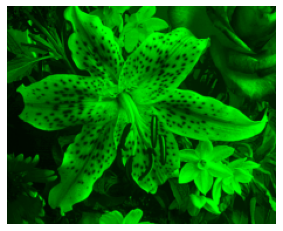

In [40]:
plt.imshow(GOnly)
plt.axis('Off')

<div style="background:#EEEEFF;color:black">
    
**Exercise 2** Repeat the visualisation for the other two channels and note the results. In particular, you should pay attention to the appearance of the pink dots on the flowers (I think of them as the equivalent of "freckles", but that's probably just plain weird!).
    
What do you notice about the appearance of these dots on the _red_ channel in particular. Is this surprising? &#9724;

<div>

<details>
     <summary outline="1pt">  Click here to see one solution to <b>Ex. 2</b>. </summary>
    
```python

# Make an empty empty image of all zeros
GOnly = np.zeros((H,W,3), dtype=np.uint8) 
    
# Copy over the green channel, only
GOnly[:,:,1] = imdata[:,:,1]

plt.imshow(GOnly)
plt.axis('Off')
    
```
</details>

<div style="background:#EEEEFF;color:black">

**Exercise 3** Repeat the visualisation of each of the three channels using a grey-scale colormap. This requires that you extract each of the three channels as a single scalar image field in turn, and use a grey-scale colourmap to display each of the three channels on three separate images. If you do not understand what this means, speak with a UTA/GTA. Make sure you understand this exercise, which is slightly non-intuitive, but serves a purpose in embedding the difference between paletted and true colour images, in addition to explicitly using a linear colour map to interpret/visualise the intensity of a colour channel.
    
Once you have done this, pay attention to the appearance of the pink dots on the flowers in the grey-scale visualisations of each of the three channels.◼

</div>

/var/folders/3z/cw3gkq2n01q9crzm7tl8zl7w0000gn/T/ipykernel_82902/1237161070.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  graymap = cm.get_cmap('gray')


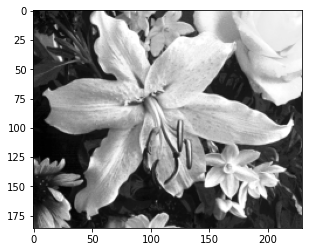

In [46]:
import matplotlib.cm as cm

graymap = cm.get_cmap('gray')
redI = imdata[:,:,0]
greenI = imdata[:,:,1]
blueI = imdata[:,:,2]

plt.imshow(redI, cmap = graymap)
#plt.imshow(greenI, cmap = graymap)
#plt.imshow(blueI, cmap = graymap)

<details>
     <summary outline="1pt">  Click here to see one solution to <b>Ex. 3</b>. </summary>
    
```python

# The import below was used earlier; just in case:
import matplotlib.cm as cm

# Note that I have used a more intuitive name for the colourmap
greymap = cm.get_cmap('gray')

# Make an empty empty scalar image
RedIntensity = imdata[:,:,0]
    
plt.imshow(RedIntensity, cmap=greymap)
plt.axis('Off')
    
```
</details>

<div style="background:#EEEEFF;color:black">

**Exercise 4** In your lecture notes, there is a little section on trichromatic coefficients, or normalised RGB channels.  Calculate these normalised (sometimes called _nRGB_ values) at each pixel of the `lily` image. You will need to convert each of the three channels to floating point before performing the calculation; you can do that using this syntax:

```python
    
    f_imdata = np.asarray(imdata, dtype=float)

    
```

I also suggest that you create (using `np.zeros`) an array of the same size as your desired image output to hold the (floating point) results. 
    
Once you have calculated the three trichromatic (nRGB) channels, visualise each of them separately using a grey-scale colourmap, and note **in particular** the behaviour of the normalised red and normalised green channels.

Finally, because you will be mapping a floating point image through a colourmap structure, you will want to remove the option which _suppresses_ the normalisation of colourspace behaviour (i.e. do **not** use `norm=colors.NoNorm()`). This invokes the the default behaviour of `imshow`, which rescales all values in the image being displayed to lie between 0 and 1, then maps the 0 to the first entry in the colourmap, and the 1 to the last entry of the colormap, with all other entries regularly spaced in that interval.
◼

</div>

<details>
    <summary outline="1pt">  Click here to see one solution to <b>Ex. 4</b>. </summary>

```python
# Make a floating point array to hold normalised data
n_fimdata = np.zeros(np.shape(imdata), dtype=float)

# Cast data to type float for calculations
f_imdata = np.asarray(imdata, dtype=float)

# Loop over each of the three channels and produce normalised channel
for i in range(np.shape(f_imdata)[2]):
    n_fimdata[:,:,i] = f_imdata[:,:,i]/(np.sum(f_imdata,2))

# Below, we do the plots...
fig, axs = plt.subplots(1,3)
axs[0].imshow(n_fimdata[:,:,0], cmap='gray')
axs[0].set_title('nR') # Note the inconsistent syntax of this!
axs[0].axis('Off')
axs[1].imshow(n_fimdata[:,:,1], cmap='gray')
axs[1].set_title('nG') # Note the inconsistent syntax of this!
axs[1].axis('Off')
axs[2].imshow(n_fimdata[:,:,2], cmap='gray')
axs[2].set_title('nB') # Note the inconsistent syntax of this!
axs[2].axis('Off')

```
</details>

### 5. DICOM Images

DICOM 3.0 is a standard for the encoding of medical image data, and also for network transmission of those images between scanners. The _Python_ library **pydicom** has some routines for reading DICOM 3.0 files from disk, and this is what we'll be doing in this section. 

First, follow the guidelines on the [**pydicom** intallation page](https://pydicom.github.io/pydicom/stable/tutorials/installation.html) to install this package. Once you have got through this step, you can proceed. Please note that there is a conda instruction further down the installation page, which I recommend using.

First, look at the methods of the `pydicom` module:

In [ ]:
import pydicom as dcm
dir(dcm)

We can see that there is a `dicomread` method; so let's apply it to the 
example DICOM 3.0 image `US-PAL-8-10x-echo.dcm`  (this is from the _Matlab_ (The Mathworks) distribution). Use the following syntax to from the `IMGS/` directory:

In [ ]:
# If the line below does not work, you may be in the wrong directory...
ds = dcm.dcmread('IMGS/US-PAL-8-10x-echo.dcm')
print(ds)

**Quiz**

1. How many rows do you think are in the colour palette?

2. Do you think that this is a grey-scale palette?

Let's try to get at the pixel data. We can see that there are 10 frames that have been stored in the file (`Number of Frames`). 

Let us see what methods are available to us in the `ds` object. We can do that with this command:


In [ ]:
dir(ds)

Having done that, we can investigate the types of some of the methods/attributes associated with this class.

For example:

In [ ]:
type(ds.PixelData)

...which looks like it is treated as a buffer (see the earlier exercise on the `head.128` image. And we can also check out the next promising looking name for the pixel information:

In [ ]:
type(ds.pixel_array)

Ha! Let's see what the shape of this is:

In [ ]:
np.shape(ds.pixel_array)

Even better. Note the match in the first dimension of this pixel array with the "Number of Frames" reported by `print(ds)`.

<div style="background:#EEEEFF;color:black">

**Exercise 5** Start by  extracting and the displaying the information in the pixel array using the default colourmap, without extracting the colourmap from the `ds` object (we will get to this later).
    
You may want to loop over the frames of the image and display each one in sequence; the commmand `plt.pause(1)` will place a one second delay after showing each image, so you can see each image (even though the colourmap will not yet be right, until you load it from the `ds` object and apply it). Unless you use such a pause, or force a display refresh in some way, this, the image that is shown will only be updated at the _end_ of the loop, and so you will only see the last frame. ◼

</div>

<details>
   <summary> Click here for one solution to <b> Ex. 5</b> </summary>
    
```python
# In case the figures from Section 4 are still open...
plt.close()
    
im = ds.pixel_array

for i in range(np.shape(im)[0]):
    plt.imshow(np.squeeze(im[i,:,:])) # Default colourmap, so will be incorrect
    plt.pause(1)
```
    
</details>

Of course, displaying the pixel values without the colourmap is somewhat nonsensical, but at least we can see some spatial structure in the images, which means we have at least got the image geometry correct. If we hadn't, we would just see squiggles or zig-zagging lines....

<div style="background:#EEEEFF;color:black">

**Exercise 6** Extract the colourmap from the 
`ds` object. Here are two hints:
    
a) You will see that there are DICOM elements that correspond to
   the red, green and blue columns of a look up table; they are stored spearately, but each has the same number of elements. Although they are separate, this is still NOT an RGB image, it is paletted.
    
b) The values in these tables can be treated as buffers containing raw
   byte streams in memory, and the earlier example of using `np.buffers` 
   is quite applicable to convert them into appropriate _Python_ types 
   (but be careful, as these intensities are specified using 2 bytes, 
   rather than 1, as we have met so far).
    
_Hint_: You can follow (with some adaptation) the pattern we used for the `trees.tif` image in [Section 4](#Sec-4)  ◼

</div>

<details>
    <summary> Click here to see one implentation of a solution to <b> Ex. 6 </b></summary>

```python
#
# We get this dtype information about uint16 from the DICOM header
# 
lut_r=[np.frombuffer(ds.RedPaletteColorLookupTableData, dtype=np.uint16)]
lut_g=[np.frombuffer(ds.GreenPaletteColorLookupTableData, dtype=np.uint16)]
lut_b=[np.frombuffer(ds.BluePaletteColorLookupTableData, dtype=np.uint16)]

lut = np.transpose(np.vstack((lut_r, lut_g, lut_b)))

maximum_channel_value = (2**16-1) # How is this deduced?
lutn = np.asarray(lut, dtype=float)/float(maximum_channel_value)

# An obscure (but vital) Matplotlib function...
cmap = colors.ListedColormap(lutn, name='us_colormap')

plt.imshow(im[0,:,:], cmap=cmap, norm=colors.NoNorm(), interpolation='Nearest')

```
</details>

<div class="alert alert-info">
    
There is a slightly easier way to also produce a valid image using methods attached to the `pydicom` module; specifically, there are data handlers, one of which will directly map the image values through the colourmap to produce an RGB image, which can be displayed as usual using `plt.imshow()`. Because the image representation is in RGB space, interpolators will work fine, because the interpolation will be applied directly to the R, G and B colour spaces, rather than the possibly discontinuous paletted image representation.
    

You may investigate this yourself, but here is an example below:
    
```python
    
rgbarr = dcm.pixel_data_handlers.apply_color_lut(im, ds)
rgbarr = np.asarray(arr, dtype=float)/
            float(maximum_channel_value)
plt.imshow(rgbarr)
    
    
```
    

</div>

### Appendix 1: Advanced Topics
We can investigate the implmentation of some _Python_ modules - those that have not been converted into C code, for example, using the `inspect` module;here is an example of using this to look at the `colors.Normalize()` method within **matplotlib**.

```python
import inspect
print(inspect.getsource(colors.Normalize))
```